In [1]:
import datetime
from coursework import distance, daterange, new_kmeans, Mean, pca
import json
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import axes3d

In [2]:
with open('coordinates/2012-01-07', 'r') as file:
    coor = json.load(file)
coor = list(coor.values())

In [3]:
with open('coordinates/2012-02-12', 'r') as file:
    coor2 = json.load(file)
coor2 = list(coor2.values())

In [4]:
pca = PCA(n_components=3)
coor3 = pca.fit_transform(coor)
coor23 = pca.fit_transform(coor2)

In [7]:
with open('clusters_timeline','r') as file:
    clusters = json.load(file)
with open('centres_timeline','r') as file:
    centroids = json.load(file)

In [13]:
# choosing optimal semi-axes for ellipsoids
def get_semi(clusters, centroids):
    
    num_clust = len(clusters)
    semi = []
    for i in range(num_clust):
        semi.append([])
    for j in range(num_clust):
        for index, coord in enumerate(np.array(clusters[j]).T):
            # semi-axes are calculated as standard deviation of the coordinates
            semi[j].append(np.sqrt(sum((coord - centroids[j][index])**2)/len(coord)))

    # choosing optimal semis
    semis = []
    for j in range(num_clust):
        semis.append([])

    for i in range(num_clust):
        
        semis[i] = np.array(semi[i])
        m = len(clusters[i])
        counter = 0
        percent = counter / m
        omega = 1.01

        while percent < 0.95:

            for point in clusters[i]:

                if sum((np.array(point)-np.array(centroids[i]))**2 / (semis[i])**2) < 1:
                    counter += 1

            percent = counter / m
            counter = 0
            semis[i] *= omega
            
            
    print(f'{round(percent*100, 2)}% of the points are in the ellipsoid')
    
    return semis

In [15]:
semis = get_semi(clusters[0], centroids[0])

95.26% of the points are in the ellipsoid


In [29]:
semis1 = np.array([semis[0][0]] + [semis[0][1]] + [semis[0][2]])

In [30]:
inner_idx1 = []
outter_idx1 = []

for idx in range(len(cluster1)):
    
    if sum((np.array(cluster1[idx])-np.array(centroid1))**2 / (semis1)**2) < 1:
        inner_idx1.append(idx)
        
    else:
        outter_idx1.append(idx)

In [32]:
outter_points1 = list(cluster1.copy())
inner_points1 = list(cluster1.copy())

for i in sorted(inner_idx1, reverse=True):
    outter_points1.pop(i)
    
for j in sorted(outter_idx1, reverse=True):
    inner_points1.pop(j)

<IPython.core.display.Javascript object>


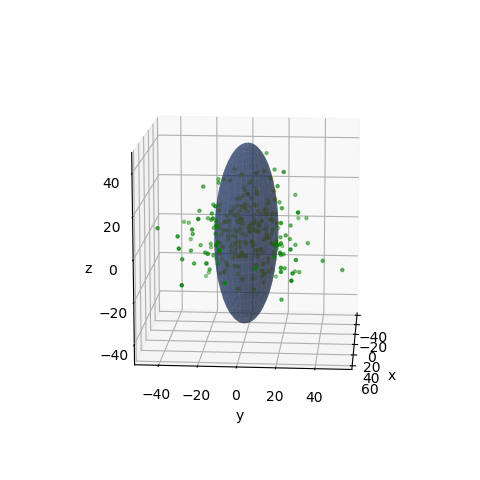

In [38]:
%matplotlib notebook
fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

# rx, ry, rz = np.array(semis)
rx1, ry1, rz1 = np.array(semis1)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
# x = rx * np.outer(np.cos(u), np.sin(v)) + centroid[0]
# y = ry * np.outer(np.sin(u), np.sin(v)) + centroid[1]
# z = rz * np.outer(np.ones_like(u), np.cos(v)) + centroid[2]



x1 = rx1 * np.outer(np.cos(u), np.sin(v)) + centroid1[0]
y1 = ry1 * np.outer(np.sin(u), np.sin(v)) + centroid1[1]
z1 = rz1 * np.outer(np.ones_like(u), np.cos(v)) + centroid1[2]

# Plot:

# ax.scatter3D(xs = cluster_T[0], ys = cluster_T[1], zs = cluster_T[2], c='r', marker='.')
# ax.scatter3D(xs = np.array(outter_points).T[0], ys = np.array(outter_points).T[1], zs = np.array(outter_points).T[2], c='b', marker='.')
# ax.scatter3D(xs = np.array(inner_points).T[0], ys = np.array(inner_points).T[1], zs = np.array(inner_points).T[2], c='r', marker='.')
ax.scatter3D(xs = np.array(outter_points1).T[0], ys = np.array(outter_points1).T[1], zs = np.array(outter_points1).T[2], c='g', marker='.')
ax.scatter3D(xs = np.array(inner_points1).T[0], ys = np.array(inner_points1).T[1], zs = np.array(inner_points1).T[2], c='y', marker='.')
# ax.scatter3D(xs = np.array(cluster2).T[0], ys = np.array(cluster2).T[1], zs = np.array(cluster2).T[2], c='y', marker='.')
# ax.plot_surface(x, y, z,  rstride=4, cstride=4, color=(0.1,0.5,0.5, 0.5))
ax.plot_surface(x1, y1, z1,  rstride=4, cstride=4, color=(0.1,0.2,0.4, 0.5))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx1, ry1, rz1)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
plt.axis('equal')
plt.show()